<font size=6 color = "#663399" >Clustering</font>
- <font size=4>Name: Kasra Noorbakhsh</font>
- <font size=4>SID: 810100230</font>
- <font size=4>In this project we are using Clustering techniques to cluster different flowes.</font>

<font size=5 color = "#663399" >Imports and Hyperparameters</font>

In [1]:
import os
import cv2
# import PIL
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans , DBSCAN
from tensorflow.keras.layers import Flatten
from sklearn.neighbors import NearestNeighbors
# from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.applications import VGG16
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score, silhouette_score
from tensorflow.keras.applications.vgg16 import preprocess_input

eps = 160
min_samples = 5
num_clusters = 10
# normalise_means = [0.485, 0.456, 0.406]
# normalise_std = [0.229, 0.224, 0.225]

folder_path = "C:/Users/Kasra/Desktop/semester 6/AI/Projects/P3/flower_images"
weights_path = "C:/Users/Kasra/Desktop/semester 6/AI/Projects/P3/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
labels_path = "C:/Users/Kasra/Desktop/semester 6/AI/Projects/P3/flower_images/flower_labels.csv"

ModuleNotFoundError: No module named 'cv2'

<font size=5 color = "#663399" >Data Set</font>

- <font size=4>In our data set we have pictures of different flowers. After reading them I ploted 5 of them randomly</font>

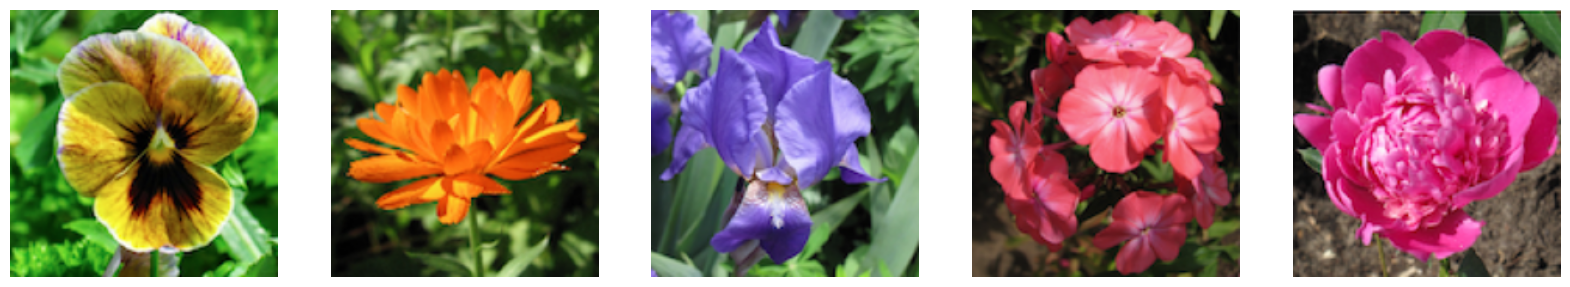

In [ ]:
# def preprocess_image(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#     _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     kernel = np.ones((5, 5), np.uint8)
#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
#     sure_bg = cv2.dilate(opening, kernel, iterations=3)
#     sure_fg = cv2.erode(sure_bg, kernel, iterations=3)
#     unknown = cv2.subtract(sure_bg, sure_fg)

#     _, markers = cv2.connectedComponents(sure_fg)
#     markers += 1
#     markers[unknown == 255] = 0
    
#     markers = cv2.watershed(image, markers)
#     image[markers == -1] = [255, 0, 0] 
    
#     return image

# def read_images(folder_path, target_size=(224, 224)):
#     images = []

#     for filename in os.listdir(folder_path):
#         if filename.endswith(".png"):
#             img_path = os.path.join(folder_path, filename)
#             img = cv2.imread(img_path)

#             if img is not None:
#                 img_resized = cv2.resize(img, target_size)
#                 preprocessed_img = preprocess_image(img_resized)
#                 images.append(preprocessed_img)

#     return np.array(images, dtype=np.float32)

def read_images(folder_path, target_size = (224, 224)):

    images = []

    for filename in os.listdir(folder_path):

        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img_resized = cv2.resize(img, target_size)
                # img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
                # img_preprocessed = preprocess_input(img_rgb)
                # img_normalized = (img_preprocessed / 255.0 - normalise_means) / normalise_std
                images.append(img_resized)

    return np.array(images, dtype = np.float32)


# def read_images_hsv(folder_path, target_size=(224, 224)):

#     images_hsv = []

#     for filename in os.listdir(folder_path):

#         if filename.endswith(".png"):
#             img_path = os.path.join(folder_path, filename)
#             img = cv2.imread(img_path)

#             if img is not None:
#                 img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#                 img_resized = cv2.resize(img_hsv, target_size)
#                 images_hsv.append(img_resized)

#     return np.array(images_hsv, dtype=np.float32)


def display_random_images(images, num_images_to_plot = 5):

    fig, axes = plt.subplots(1, num_images_to_plot, figsize=(20, 10))
    
    for i in range(num_images_to_plot):
        img = random.choice(images)
        img = img.astype(np.float32) / 255.0
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
    plt.show()


flower_images = read_images(folder_path)
display_random_images(flower_images)

<font size=5 color = "#663399" >Preprocess and Feature Extraction</font>

- <font size=4>Q1: Clustering images only using their pixel values can be computationally intensive and may not always capture meaningful features for the task. Also Pixel values can be sensitive to noise and variations in lighting conditions, which can lead to poor clustering results and Pixel values alone may not capture the semantic content of an image. For example, two images might have similar pixel values but completely different content (e.g., a white cat on a white background versus a white dog on a white background).</font>

- <font size=4>Q2: 
    * Histogram of Oriented Gradients (HOG): HOG is a feature descriptor that captures the distribution of gradient orientations in an image. It works by dividing the image into small cells and computing histograms of gradient orientations within each cell. HOG features are particularly useful for object detection and recognition tasks, as they capture the shape and structure of objects in an image while being robust to changes in illumination and background clutter.
    
    * Convolutional Neural Networks (CNNs):In CNNs, convolutional layers learn to extract features at different spatial scales and levels of abstraction through the use of filters (kernels). As the network is trained on a large dataset for a specific task (e.g., image classification), it learns to extract features that are relevant for that task. CNNs have shown remarkable performance in various computer vision tasks, including image classification, object detection, segmentation, and image generation.
    
    * Scale-Invariant Feature Transform (SIFT):SIFT is a feature extraction algorithm that detects and describes local features in an image, which are invariant to changes in scale, rotation, and illumination. It works by first identifying keypoints in the image using scale-space extrema detection (identifying points where the difference of Gaussian convolutions is maximized).For each keypoint, SIFT computes a descriptor based on local gradient orientations and magnitudes in the surrounding region. SIFT features are widely used in tasks such as image stitching, object recognition, and matching, where robustness to geometric transformations is essential.</font>

- <font size=4>Q3: One can be  ```Resizing``` to Ensure that all images have the same dimensions (as done above). Another preprocess could be  ```Normalization``` that after it, pixel values are bound to a common scale, usually between 0 and 1. This helps in faster convergence during training and prevents features with larger scales from dominating the learning process.</font>

In [ ]:
base_model = VGG16(weights = weights_path, include_top = False)

x = Flatten()(base_model.output)

model = Model(inputs = base_model.input, outputs = x)

def extract_features(images):
    preprocessed_images = np.array([preprocess_input(img) for img in images], dtype = np.float32)
    features = model.predict(preprocessed_images)
    return features

flower_features = extract_features(flower_images)

# scaler = MinMaxScaler()
# flower_features_scaled = scaler.fit_transform(flower_features)

7/7 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step


<font size=5 color = "#663399" >Clustering Algorithm</font>

- <font size=4>Q4: ```K-Means Clustering:``` K-Means is a popular unsupervised machine learning algorithm used for clustering, which involves grouping similar data points into clusters. The algorithm aims to partition the data into 'k' clusters, where each cluster is characterized by its center that is the mean of all data points in the cluster Algorithm Steps:
    * Initialization: Choose the number of clusters, 'k'. Randomly initialize 'k' cluster centers in the data space.
    * Assignment Step: Assign each data point to the cluster whose center is closest in terms of Euclidean distance. This forms 'k' clusters.
    * Update Centers: Recalculate the centers of each cluster by taking the mean of all data points assigned to that cluster.
    * Repeat Steps 2 and 3: Iterate between the assignment and center update steps until convergence or a predefined number of iterations. Convergence occurs when the centers no longer change significantly. 
    
    Pros:
    - It is more efficient for large datasets.
    - It is simpler to understand and implement.

    Cons:
    - It is sensitive to outliers. 
    - It is sensitive to the initial placement of centroids.
    - It assumes that clusters are convex and isotropic, which is not always the case.

    ```DBSCAN (Density-Based Spatial Clustering of Applications with Noise):``` DBSCAN is a density-based clustering algorithm designed to identify clusters of arbitrary shapes in a dataset. Unlike K-Means, DBSCAN does not assume clusters to be spherical and can discover clusters with varying shapes and sizes. It classifies data points into three categories: core points, border points, and noise points. 
    
    Algorithm Steps:

    * Parameter Selection: Choose two parameters: epsilon (ε,the radius around each data point), and MinPts(the minimum number of points required to form a dense region).
    * Core Point Identification: Identify core points by checking if a point has at least MinPts neighbors within its ε-radius.
    * Cluster Formation: Form a cluster by connecting core points that are within each other's ε-radius. If two core points share neighbors, they belong to the same cluster.
    * Border Point Assignment: Assign border points to the cluster of a reachable core point within their ε-radius.
    * Noise Point Identification: Identify and label remaining points as noise.

    Pros:
    - It is more robust to noise and can handle clusters of varying densities.
    - It does not require the number of clusters to be specified in advance and can discover clusters of arbitrary shapes.

    Cons:
    - It cannot efficiently handle high dimensional datasets.
    - The quality of DBSCAN depends heavily on the distance measure used and the chosen parameters.
</font>

- <font size=4>Q5: The elbow method that is a heuristic used to determine the optimal number of clusters in a dataset by plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" point on the plot represents the optimal number of clusters where the rate of decrease in WCSS slows down. We set the k 10 because on the file we had 10 clusters but here we found optimal k 8.(data set probelm) </font>

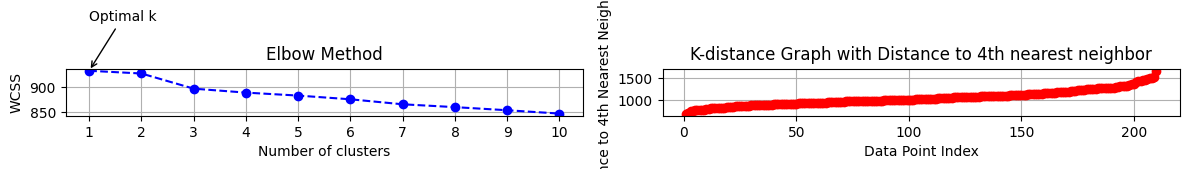

The optimal number of clusters (k) is: 1


In [ ]:
# elbow method for finding k

max_clusters = 10

wcss = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(flower_features)
    wcss.append(sum(np.min(cdist(flower_features, kmeans.cluster_centers_, 'euclidean'), axis = 1)) / flower_features.shape[0])

deltas = np.diff(wcss)
acceleration = -1 * np.diff(deltas)

optimal_k_index = np.argmax(acceleration) + 1

nn = NearestNeighbors(n_neighbors=4)
nn.fit(flower_features)
distances, _ = nn.kneighbors(flower_features)
distances = np.sort(distances[:, -1])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.annotate('Optimal k',
             xy=(optimal_k_index, wcss[optimal_k_index - 1]),
             xytext=(optimal_k_index, wcss[optimal_k_index - 1] + 100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(distances) + 1), distances, marker='o', color='r')
plt.title('K-distance Graph with Distance to 4th nearest neighbor')
plt.xlabel('Data Point Index')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.grid(True)

plt.tight_layout()
plt.show()

print("The optimal number of clusters (k) is:", optimal_k_index)

In [ ]:
# K-Means

kmeans = KMeans(n_clusters = num_clusters, random_state = 42)

kmeans.fit(flower_features)

K_Means_cluster_labels = kmeans.labels_

print("Cluster Labels Using K-Means:", np.unique(K_Means_cluster_labels))

Cluster Labels Using K-Means: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# DBSCAN

dbscan = DBSCAN(eps = eps, min_samples = min_samples)

dbscan.fit(flower_features)

DBSCAN_cluster_labels = dbscan.labels_

print("Cluster Labels Using DBSCAN:", np.unique(DBSCAN_cluster_labels))

Cluster Labels Using DBSCAN: [-1]


<font size=5 color = "#663399" >Dimenssion Reduction</font>

<font size=4>Q7: ```Principal Component Analysis (PCA)``` is a dimensionality reduction technique widely used in various fields, including machine learning, statistics, and signal processing. Its primary purpose is to transform high-dimensional data into a lower-dimensional representation while preserving the most important information. PCA reduces the dimensionality of the data by transforming it into a new set of variables (principal components) that capture the most important information.


- PCA begins by computing the covariance matrix of the original data. The covariance matrix provides information about the relationships between different features in the dataset.

- The next step involves finding the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues quantify the amount of variance along those directions.

- PCA orders the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvector with the highest eigenvalue represents the principal component with the most significant variance in the data. Subsequent eigenvectors capture decreasing amounts of variance.

- The selected eigenvectors (principal components) are used to create a transformation matrix. The original data is then projected onto this lower-dimensional subspace defined by the principal components.</font>

C:\Users\Kasra\AppData\Local\Temp\ipykernel_11676\3262680287.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(flower_features_pca[mask, 0], flower_features_pca[mask, 1], label = cluster_names[i], cmap = 'viridis', alpha = 0.5)


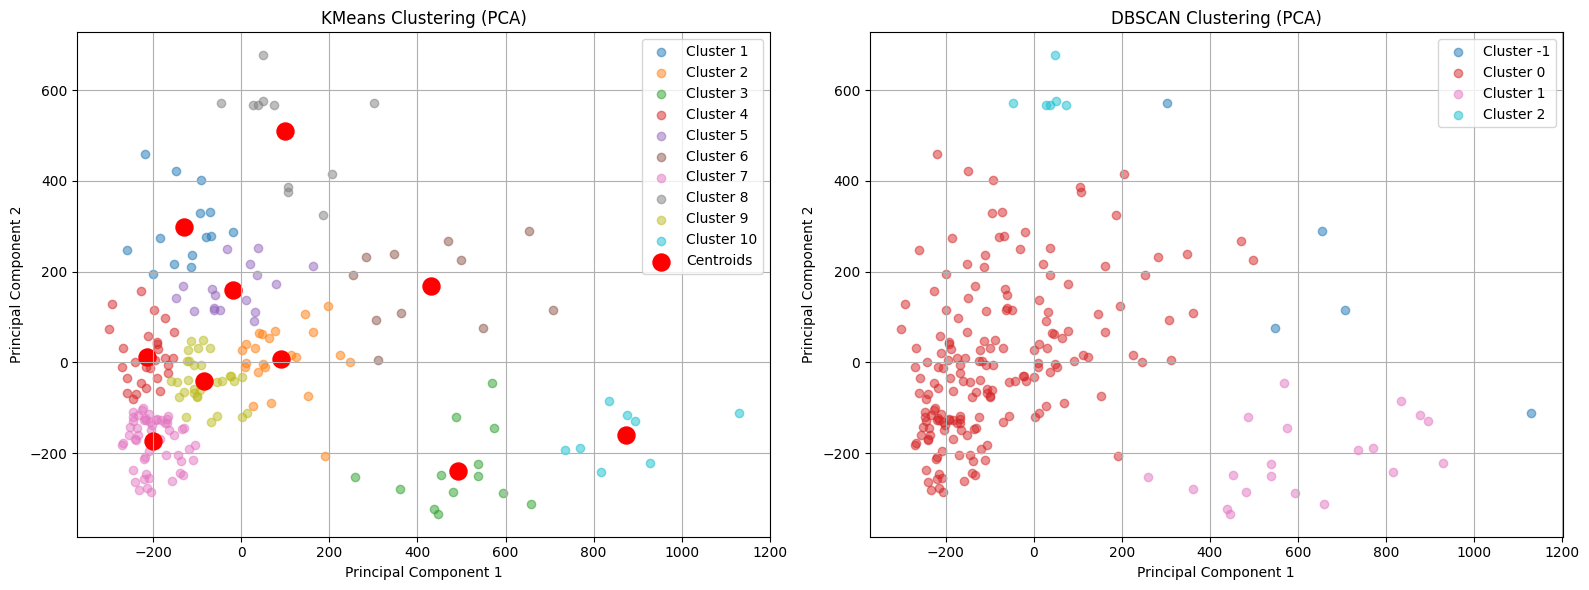

In [ ]:
pca = PCA(n_components=2)
flower_features_pca = pca.fit_transform(flower_features)

kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
cluster_labels_kmeans = kmeans.fit_predict(flower_features_pca)
centroids_kmeans = kmeans.cluster_centers_

cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10']

# Plotting KMeans clustering
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

for i, label in enumerate(np.unique(cluster_labels_kmeans)):

    mask = (cluster_labels_kmeans == label)
    plt.scatter(flower_features_pca[mask, 0], flower_features_pca[mask, 1], label = cluster_names[i], cmap = 'viridis', alpha = 0.5)

plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], marker = 'o', c = 'red', s = 150, label = 'Centroids')
plt.title('KMeans Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

dbscan = DBSCAN(eps = eps, min_samples = min_samples)
cluster_labels_dbscan = dbscan.fit_predict(flower_features_pca)

# Plotting DBSCAN clustering
plt.subplot(1, 2, 2)
unique_labels = np.unique(cluster_labels_dbscan)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
for i, label in enumerate(unique_labels):
    mask = (cluster_labels_dbscan == label)
    # if label == -1:
    #     plt.scatter(flower_features_pca[mask, 0], flower_features_pca[mask, 1], c='k', label='Noise', alpha=0.5)
    # else:
    plt.scatter(flower_features_pca[mask, 0], flower_features_pca[mask, 1], c=[colors[i]], label = f'Cluster {label}', alpha = 0.5)
    
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<font size=5 color = "#663399" >Evaluation</font>

<font size=4>Q8: ```Homogeneity Score```: The Homogeneity Score is a metric designed to evaluate the quality of clustering results by assessing how well the clusters align with the true classes or labels of the data. Specifically, it measures the degree to which each cluster predominantly consists of data points from a single class, providing insights into the cohesion of clusters with respect to class membership.

steps of execution:

1. Assigning Data Points to Clusters
2. Computing Entropy of Class Labels
3. Computing Conditional Entropy of Class Labels Given Clusters
4. Calculating Homogeneity Score

$$H = \frac{1}{N} \sum \left(\frac{{\max(\text{{class\_count}})}}{{N_{\text{{cluster}}}}}\right)$$

where N is the total number of samples, N_cluster is the number of samples in the cluster, and max(class_count) is the count of the most frequent class label within the cluster.

```Silhouette Score```: The silhouette score evaluates the fitness of each sample within its assigned cluster and its distinctiveness from samples in neighboring clusters. This metric offers insights into both the cohesion within clusters and the separation between clusters. The silhouette score is a numerical measure that falls within the range of -1 to 1.

steps of execution:

1. For a given sample the average distance between that sample and all other samples within the same cluster is computed. This is known as the intra-cluster distance ($a$).
2. The average distance between that sample and all samples in the nearest neighboring cluster is calculated. This is known as the inter-cluster distance ($b$).
3. The silhouette score for the sample is computed using the formula:

$$\text{{silhouette\_score}} = \frac{{b - a}}{{\max(a, b)}}$$

- Steps 1-3 are repeated for each sample, and the average silhouette score across all samples is calculated to obtain the overall silhouette score for the clustering result.</font>

In [ ]:
true_labels_df = pd.read_csv(labels_path, delimiter = ',')
true_labels = true_labels_df['label'].tolist()

# Evaluate KMeans clustering after dimmension reduction
homogeneity_kmeans_after = homogeneity_score(true_labels, cluster_labels_kmeans)
silhouette_kmeans_after = silhouette_score(flower_features_pca, cluster_labels_kmeans)

# Evaluate DBSCAN clustering after dimmension reduction
homogeneity_dbscan_after = homogeneity_score(true_labels, cluster_labels_dbscan)
silhouette_dbscan_after = silhouette_score(flower_features_pca, cluster_labels_dbscan)

print("KMeans Clustering after dimmension reduction:")
print("Homogeneity Score:", homogeneity_kmeans_after)
print("Silhouette Score:", silhouette_kmeans_after)

print("\nDBSCAN Clustering after dimmension reduction:")
print("Homogeneity Score:", homogeneity_dbscan_after)
print("Silhouette Score:", silhouette_dbscan_after)

# Evaluate KMeans clustering before dimmension reduction
homogeneity_kmeans = homogeneity_score(true_labels, K_Means_cluster_labels)
silhouette_kmeans = silhouette_score(flower_features, K_Means_cluster_labels)

print("\nKMeans Clustering before dimmension reduction:")
print("Homogeneity Score:", homogeneity_kmeans)
print("Silhouette Score:", silhouette_kmeans)

KMeans Clustering after dimmension reduction:
Homogeneity Score: 0.44460057445376894
Silhouette Score: 0.38753757

DBSCAN Clustering after dimmension reduction:
Homogeneity Score: 0.15382813110151902
Silhouette Score: 0.48572132

KMeans Clustering before dimmension reduction:
Homogeneity Score: 0.34631783589019244
Silhouette Score: 0.027009852


<font size=4> Q10: 

1- Feature Selection/Extraction: Reducing the dimensionality of data can improve the speed and potentially the accuracy of models. 

2- Algorithm Modification: There are improved versions of these algorithms that can be considered. For instance, an improved DBSCAN algorithm called K-DBSCAN applies an initial grouping to the data through the K-means++ algorithm, then employs DBSCAN to perform clustering in each group separately.

3- Larger Dataset: To improve the performance of our model, it may be necessary to have a larger training dataset. Because in our dataset we have 10 clusters each has 20 flowers and this amount is very low for training. </font>